In [3]:
imports_path = ".\\imports.ipynb"
tableGAN_path = ".\\tableGAN.ipynb"
utils_path = ".\\utils.ipynb"

%run "$imports_path"

In [4]:
%run "$utils_path"
%run "$tableGAN_path"
%load_ext line_profiler
data= pd.read_csv('Datasets\\df_adult_edited.csv')

In [5]:
n_epochs = 20
n_critic = 10
adam_lr = 0.002
adam_beta1 = 0.5
model_dir = ".\\Model\\tableGAN_ckpt\\compare_adult\\"
noise_discrete_unif_max = 0

batch_size = 500
ckpt_every = 1
loss_plot_update_every = 10

image_dir = ".\\Images"
timer_dir = ".\\Timers"
timer_path = os.path.join(timer_dir, "timer_tgan.pkl")
retrain = True

if not os.path.exists(timer_path):
    timer = Timer()
    timer.save(timer_path)
    del timer

In [6]:
tg = TableGAN(data, n_critic = n_critic, adam_lr = adam_lr, adam_beta1 = adam_beta1, 
              ckpt_dir = model_dir + "ref",
              quantile_transformation_int = False, quantile_rand_transformation = False,
             noise_discrete_unif_max = noise_discrete_unif_max, use_query = False)

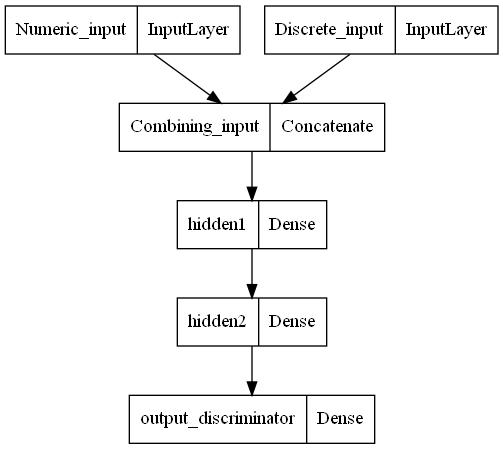

In [11]:
tf.keras.utils.plot_model(tg.discriminator, show_layer_activations=False,
                         to_file="Images//plot_discriminator_adult.jpg", rankdir="TP")

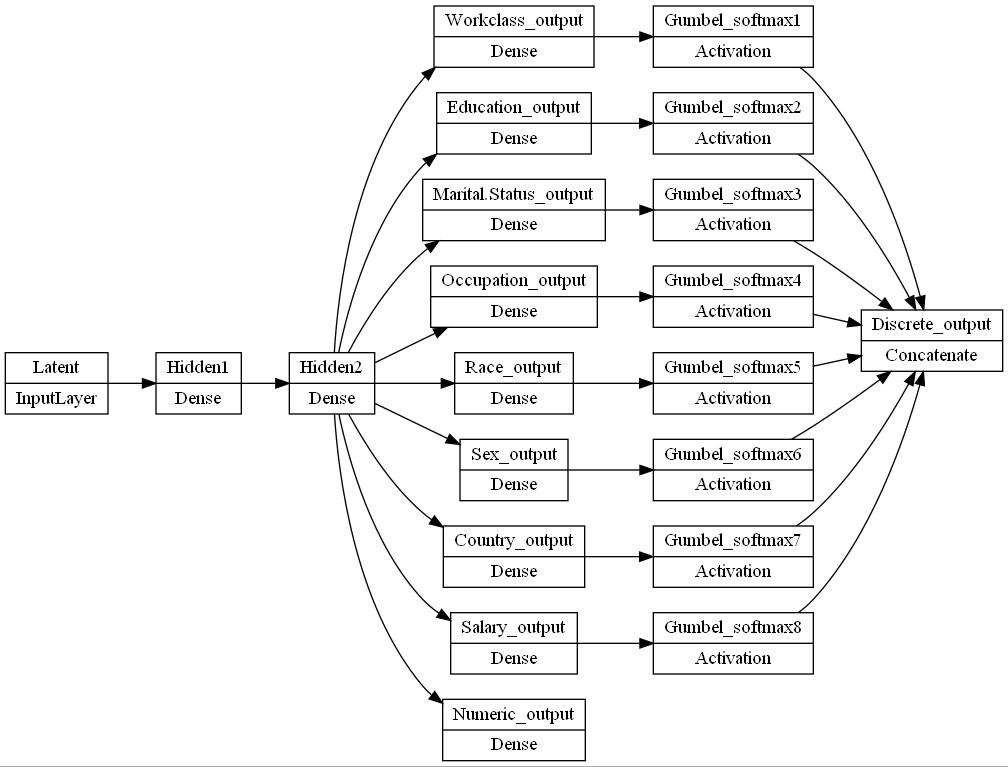

In [13]:
tf.keras.utils.plot_model(tg.generator, show_layer_activations=False,
                         to_file="Images//plot_generator_adult.jpg", rankdir="LR")